In [3]:
import pandas as pd
import numpy as np
import sys
import os

In [8]:
sys.path.append(os.path.abspath('../common')) # add path to common functions

In [9]:
train_seq = pd.read_csv('../datasets/train/train_text_seq.csv')
valid_seq = pd.read_csv('../datasets/valid/valid_text_seq.csv')
test_seq = pd.read_csv('../datasets/test/test_text_seq.csv')

In [10]:
print(train_seq)


                                              input_str  label
0     0000154364642718159661428002624223132284159626...      0
1     0004641596369515436422262614110471596262476161...      0
2     0001543626215965999614422464135806142624051159...      0
3     0000154364224641238614262159689561596284351061...      1
4     0004641899422154362069015966142624761262159661...      1
...                                                 ...    ...
7075  0000026267027181596614464154364222842626141596...      1
7076  0000464422155826261433491543615961596284614390...      1
7077  0003069915964309154366142624644222841795262614...      1
7078  0000614159615436198346426242237758262159694061...      0
7079  0000154366144221596464476126219231596614189926...      0

[7080 rows x 2 columns]


In [11]:
train_seq.shape


(7080, 2)

In [12]:
valid_seq.shape

(489, 2)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

# Initialize the CountVectorizer to convert text sequences into feature vectors
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 5))

# Prepare train and validation data
X_train = vectorizer.fit_transform(train_seq['input_str'])
y_train = train_seq['label']

X_valid = vectorizer.transform(valid_seq['input_str'])
y_valid = valid_seq['label']

# Show the shape of the transformed data
X_train.shape, X_valid.shape


((7080, 15029), (489, 15029))

#### MODELS TRAINED BELOW
#### 1)LOGISTIC REGRESSION
#### 2)RANDOM FOREST
### 3)MLP


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Initialize the models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Train the models
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
mlp_clf.fit(X_train, y_train)

# Evaluate the models on the validation set
log_reg_pred = log_reg.predict(X_valid)
rf_clf_pred = rf_clf.predict(X_valid)
mlp_clf_pred = mlp_clf.predict(X_valid)

# Calculate accuracy for each model
# log_reg_acc = accuracy_score(y_valid, log_reg_pred)
# rf_clf_acc = accuracy_score(y_valid, rf_clf_pred)
# mlp_clf_acc = accuracy_score(y_valid, mlp_clf_pred)

# log_reg_acc, rf_clf_acc, mlp_clf_acc


NameError: name 'log_reg_acc' is not defined

### PERFORMANCE METRICS

In [17]:
from evaluate import evaluate_predictions

              precision    recall  f1-score   support

     Class 0       0.67      0.69      0.68       252
     Class 1       0.66      0.65      0.65       237

    accuracy                           0.67       489
   macro avg       0.67      0.67      0.67       489
weighted avg       0.67      0.67      0.67       489



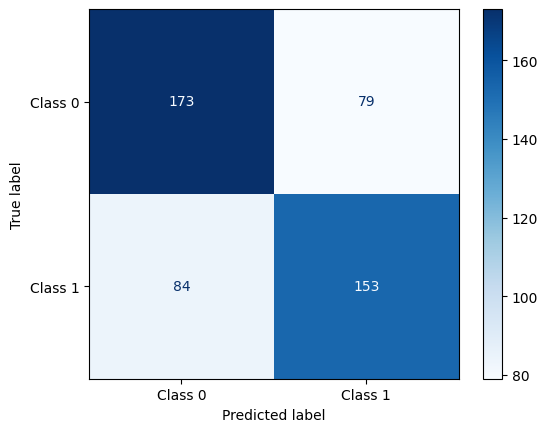

Accuracy is 0.6666666666666666


In [19]:
evaluate_predictions(y_valid, log_reg_pred)

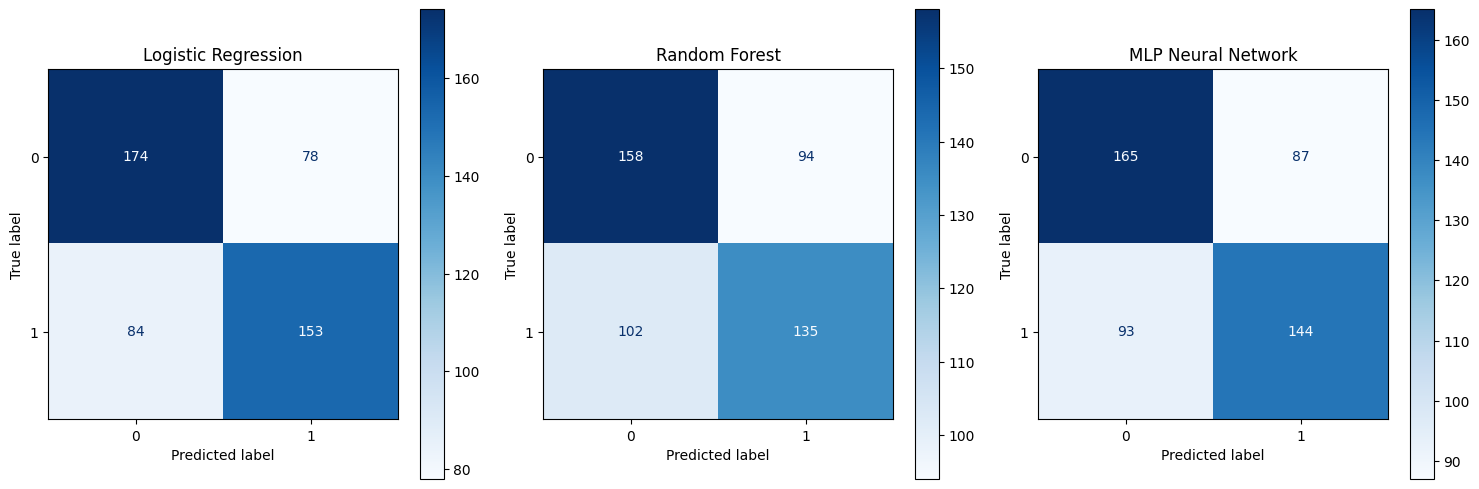

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

log_reg_cm = confusion_matrix(y_valid, log_reg_pred)
rf_cm = confusion_matrix(y_valid, rf_clf_pred)
mlp_cm = confusion_matrix(y_valid, mlp_clf_pred)

# Plot confusion matrices for each model
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Logistic Regression Confusion Matrix
ConfusionMatrixDisplay(log_reg_cm).plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Logistic Regression')

# Random Forest Confusion Matrix
ConfusionMatrixDisplay(rf_cm).plot(ax=axes[1], cmap='Blues')
axes[1].set_title('Random Forest')

# MLP (Neural Network) Confusion Matrix
ConfusionMatrixDisplay(mlp_cm).plot(ax=axes[2], cmap='Blues')
axes[2].set_title('MLP Neural Network')

plt.tight_layout()
plt.show()

## XGBoost

In [21]:
from models import predict_xgboost

In [23]:
y_xgboost = predict_xgboost(X_train, y_train, X_valid)

(7080, 15029) (7080,)


[21:59:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



              precision    recall  f1-score   support

     Class 0       0.64      0.65      0.65       252
     Class 1       0.62      0.61      0.62       237

    accuracy                           0.63       489
   macro avg       0.63      0.63      0.63       489
weighted avg       0.63      0.63      0.63       489



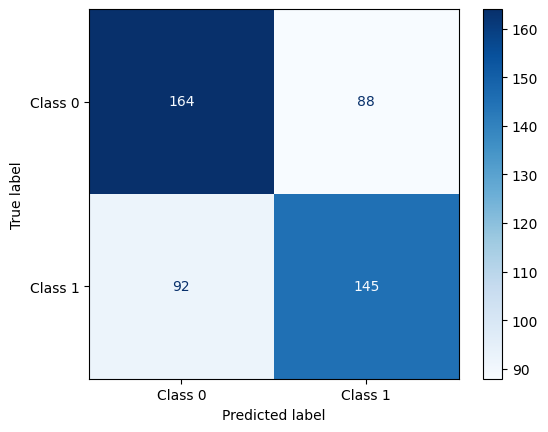

Accuracy is 0.6319018404907976


In [24]:
evaluate_predictions(y_valid, y_xgboost)